In [2]:
%pylab inline

/home/katharine/.virtualenv/video/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df = pd.read_csv('data/eu_trade_sums.csv')

In [6]:
df = df.set_index('geo')

In [7]:
np.unique(df.index)

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL',
       'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK'], dtype=object)

In [8]:
df = df.drop('EU28')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ac0066f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2abb4d9e50>]], dtype=object)

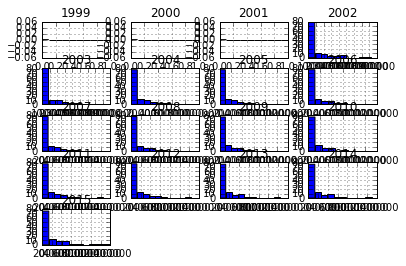

In [9]:
df.hist()

In [10]:
std_dev = df.groupby(['trade_type', 'partner']).transform(np.std)

In [11]:
std_dev.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,
AT,302010.868397,287683.956214,278037.808494,279122.497978,279891.481668,255166.260275,222310.387698,276516.501875,273922.664923,253862.590904,226793.771516,213887.941985,198305.171088,194433.069954,NaN,NaN,NaN
AT,213782.326868,199927.751952,201650.854905,197268.867646,181163.141485,158790.627564,127769.557317,152245.161796,144015.234628,136285.877915,122870.686332,112541.099455,103104.516862,106751.591547,NaN,NaN,NaN
AT,275634.224006,264287.541868,258181.972907,258807.646180,257435.387562,230318.737136,198156.432383,237241.794377,233448.114149,222389.860877,197662.397966,186413.002845,175389.140275,173252.079094,NaN,NaN,NaN
AT,179056.902659,172488.135678,171883.108457,185517.946946,177916.063730,158239.418068,127315.682150,158197.899236,147840.468428,142364.394290,123286.336103,107965.957813,97882.896084,100012.826390,NaN,NaN,NaN
BE,302010.868397,287683.956214,278037.808494,279122.497978,279891.481668,255166.260275,222310.387698,276516.501875,273922.664923,253862.590904,226793.771516,213887.941985,198305.171088,194433.069954,NaN,NaN,NaN


In [12]:
means = df.groupby(['trade_type', 'partner']).transform(np.mean)

In [13]:
std_df = df.copy()

In [14]:
for col in df.columns:
    try:
        std_df[col] = (df[col] - means[col]) / std_dev[col]
    except Exception as e:
        print(e)

'trade_type'
'partner'


In [15]:
df.head()

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
AT,Export,EU28,193043.0,187548.0,184865.0,181689.0,181889.0,166299.0,143052.0,181180.0,176327.0,159517.0,147064.0,142481.0,131439.0,126666.0,NaN,NaN,NaN
AT,Export,EXT_EU28,82468.0,80797.0,78903.0,77668.0,73038.0,63858.0,53376.0,65339.0,62447.0,58309.0,53871.0,46923.0,40317.0,39731.0,NaN,NaN,NaN
AT,Import,EU28,215023.0,210492.0,211444.0,212546.0,212734.0,187011.0,160875.0,197137.0,190105.0,175463.0,165908.0,160883.0,144982.0,134624.0,NaN,NaN,NaN
AT,Import,EXT_EU28,65242.0,63511.0,64554.0,65337.0,62293.0,52877.0,44262.0,53467.0,47817.0,43097.0,38657.0,31628.0,30994.0,30983.0,NaN,NaN,NaN
BE,Export,EU28,517836.0,502888.0,495145.0,486102.0,492083.0,449191.0,402557.0,493688.0,478972.0,446775.0,412912.0,380546.0,349210.0,345248.0,NaN,NaN,NaN


In [16]:
yrs = [str(yr) for yr in range(2002,2016)]

In [17]:
yrs

['2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

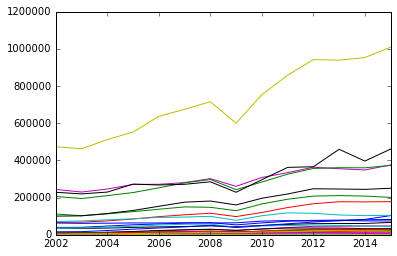

In [18]:
df[(df['trade_type'] == 'Export') & (df['partner'] == 'EXT_EU28')][yrs].T.plot(legend=False)

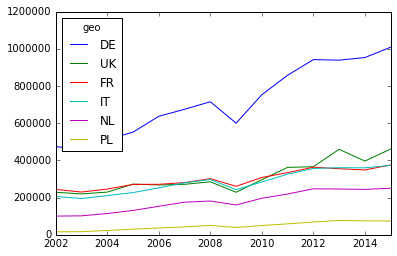

In [19]:
df[(df['trade_type'] == 'Export') & 
          (df['partner'] == 'EXT_EU28')].loc[['DE', 'UK', 'FR', 'IT', 'NL', 'PL']][yrs].T.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2aba95a590>]], dtype=object)

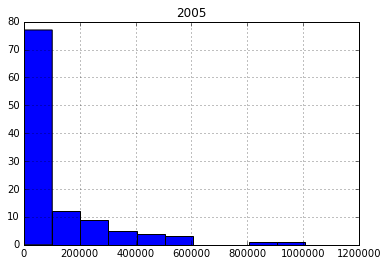

In [20]:
df.hist('2005')

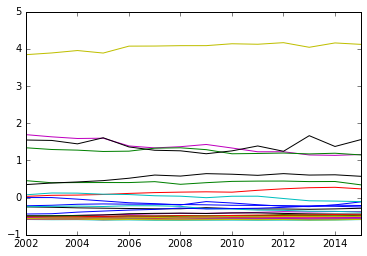

In [21]:
std_df[(std_df['trade_type'] == 'Export') & (std_df['partner'] == 'EXT_EU28')][yrs].T.plot(legend=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2aba76be90>]], dtype=object)

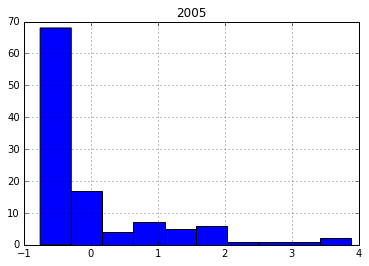

In [22]:
std_df.hist('2005')

In [23]:
mins = df.groupby(['trade_type', 'partner']).transform(np.min)

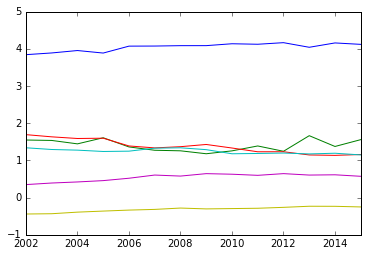

In [24]:
std_df[(std_df['trade_type'] == 'Export') & 
        (std_df['partner'] == 'EXT_EU28')].loc[['DE', 'UK', 'FR', 'IT', 'NL', 'PL']][yrs].T.plot(legend=False)

In [25]:
maxs = df.groupby(['trade_type', 'partner']).transform(np.max)

In [31]:
normed_df = df.copy()

In [32]:
for col in df.columns:
    try:
        normed_df[col] = (df[col] - mins[col]) / (maxs[col] - mins[col])
    except Exception as e:
        print(e)

'trade_type'
'partner'


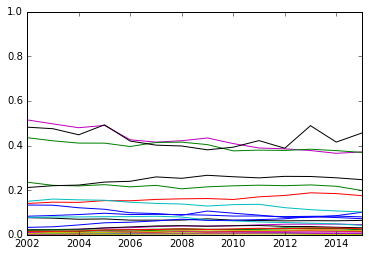

In [33]:
normed_df[(normed_df['trade_type'] == 'Export') & 
               (normed_df['partner'] == 'EXT_EU28')][yrs].T.plot(legend=False)

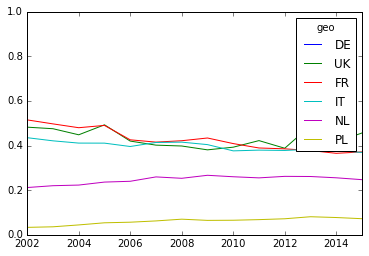

In [37]:
normed_df[(normed_df['trade_type'] == 'Export') & 
               (normed_df['partner'] == 'EXT_EU28')].loc[['DE', 'UK', 'FR', 'IT', 'NL', 'PL']][yrs].T.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2adc4c6ad0>]], dtype=object)

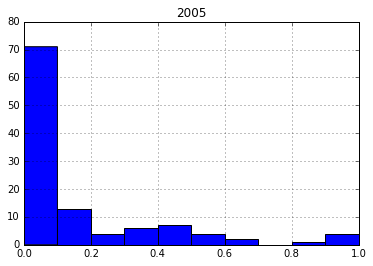

In [36]:
normed_df.hist('2005')